In [35]:
import os
import glob
import datetime
import importlib
import statistics
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prettytable import PrettyTable

In [36]:
DATA_DIR = '../data/quarterly/2-5-8-11' # quarter
# DATA_DIR = '../data/half-year/2-8' # half year
#DATA_DIR = '../data/yearly/8-1'

In [37]:
df_account = pd.DataFrame(columns=['date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    date =  os.path.basename(filepaths[i])[:-4]
    day = {'date':date, 'filepath':filepaths[i]}
    days.append(day)

df_account = df_account.append(days)

In [38]:
df_account

,date,filepath
0,2002-02-01,../data/quarterly/2-5-8-11/2002-02-01.csv
1,2002-05-01,../data/quarterly/2-5-8-11/2002-05-01.csv
2,2002-08-01,../data/quarterly/2-5-8-11/2002-08-01.csv
3,2002-11-01,../data/quarterly/2-5-8-11/2002-11-01.csv
4,2003-02-03,../data/quarterly/2-5-8-11/2003-02-03.csv
...,...,...
67,2018-11-01,../data/quarterly/2-5-8-11/2018-11-01.csv
68,2019-02-01,../data/quarterly/2-5-8-11/2019-02-01.csv
69,2019-05-01,../data/quarterly/2-5-8-11/2019-05-01.csv
70,2019-08-01,../data/quarterly/2-5-8-11/2019-08-01.csv


In [39]:
df_account['total_equity'] = 0.0
df_account['total_price'] = 0.0

In [40]:
# day별로 모든 회사들의 자기자본의 합, 시총 합을 구한다. 

In [41]:
for i in range(len(filepaths)):
    df_day = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})
    total_equity = df_day['자본총계'].sum()
    total_price = df_day['시가총액'].sum()    
    
    df_account.at[i, 'total_equity'] = total_equity
    df_account.at[i, 'total_price'] = total_price
    
    print (filepaths[i], total_equity, total_price)

../data/quarterly/2-5-8-11/2002-02-01.csv 246834089999982.0 230304515789550.0
../data/quarterly/2-5-8-11/2002-05-01.csv 267063389999986.0 270835012760810.0
../data/quarterly/2-5-8-11/2002-08-01.csv 267063389999986.0 230370944405980.0
../data/quarterly/2-5-8-11/2002-11-01.csv 267063389999986.0 218199731082460.0
../data/quarterly/2-5-8-11/2003-02-03.csv 267063389999986.0 200779795885180.0
../data/quarterly/2-5-8-11/2003-05-01.csv 286636099999978.0 216355565279370.0
../data/quarterly/2-5-8-11/2003-08-01.csv 286636099999978.0 264173050129065.0
../data/quarterly/2-5-8-11/2003-11-03.csv 286636099999978.0 287665690860020.0
../data/quarterly/2-5-8-11/2004-02-02.csv 286636099999978.0 320614543559795.0
../data/quarterly/2-5-8-11/2004-05-03.csv 334834529999975.0 326706078058285.0
../data/quarterly/2-5-8-11/2004-08-02.csv 334834529999975.0 277270249130105.0
../data/quarterly/2-5-8-11/2004-11-01.csv 334834529999975.0 321068542087765.0
../data/quarterly/2-5-8-11/2005-02-01.csv 334834529999975.0 3682

In [42]:
df_account

,date,filepath,total_equity,total_price
0,2002-02-01,../data/quarterly/2-5-8-11/2002-02-01.csv,2.468341e+14,2.303045e+14
1,2002-05-01,../data/quarterly/2-5-8-11/2002-05-01.csv,2.670634e+14,2.708350e+14
2,2002-08-01,../data/quarterly/2-5-8-11/2002-08-01.csv,2.670634e+14,2.303709e+14
3,2002-11-01,../data/quarterly/2-5-8-11/2002-11-01.csv,2.670634e+14,2.181997e+14
4,2003-02-03,../data/quarterly/2-5-8-11/2003-02-03.csv,2.670634e+14,2.007798e+14
...,...,...,...,...
67,2018-11-01,../data/quarterly/2-5-8-11/2018-11-01.csv,1.422978e+15,1.367847e+15
68,2019-02-01,../data/quarterly/2-5-8-11/2019-02-01.csv,1.422978e+15,1.481350e+15
69,2019-05-01,../data/quarterly/2-5-8-11/2019-05-01.csv,1.527724e+15,1.505817e+15
70,2019-08-01,../data/quarterly/2-5-8-11/2019-08-01.csv,1.527724e+15,1.358508e+15


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


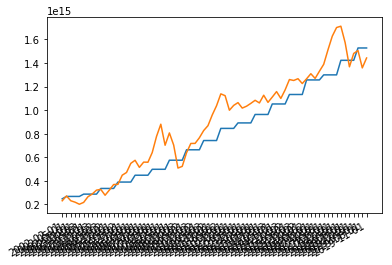

In [43]:
fig, ax = plt.subplots()
ax.plot_date(df_account['date'], df_account['total_equity'], marker='', linestyle='-')
ax.plot_date(df_account['date'], df_account['total_price'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [46]:
num_years = len(df_account) / 4

In [51]:
equity_growth = (df_account.iloc[len(df_account) - 1]['total_equity'] / df_account.iloc[0]['total_equity'] - 1.0)

In [53]:
equity_cagr = pow(equity_growth, 1/num_years)

In [54]:
equity_cagr

1.0957920400071623

In [55]:
price_growth = (df_account.iloc[len(df_account) - 1]['total_price'] / df_account.iloc[0]['total_price'] - 1.0)

In [56]:
price_cagr = pow(price_growth, 1/num_years)

In [57]:
price_cagr

1.0966623741641335